<a href="https://colab.research.google.com/github/imdressel/project_gss17/blob/main/DS3001_Project_1_Report_(Group_17).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DS3001 Project 1 (Group 17)**

Isabella Dressel, Camila Gutierrez, Catherine Nguyen, Rhiannon Staley


## **Summary**


The General Social Survey (GSS) consists of personal-interview responses from US adults since 1972 and has been used to analyze a wide variety of public attitudes including on topics such as social, religious, and political prefrences. Our research question aligned with this trend: How does marital status covary with work-life balance before and after COVID-19? Data from 2018 and 2022 were directly compared, and to examine the "work" component of the question, we looked at two variables: HRS1 and CONRINC. These variables represent hours worked a week and inflation-adjusted personal income, respectively. Three variables were utilized to look into the "life" side of the central question: MARITAL, CHILDS, and MEOVRWRK. These analyzed marital status, number of children, and perception of men prioritizing work over family, respectively. In regards to marital status and work, individuals with a separated marital status tended to work the most hours per week pre-pandemic in comparison to those widowed who worked the lowest average. Married individuals tended to have the highest average income, and the proportion of married respondents who agree that men prioritize work decreased after COVID-19. Overall, we saw that as the number of children increased, the number of individuals not married decreased. This is likely a reflection of societal and religious pressures condemning having children outside of wedlock. For individuals who never married or are married, beliefs about whether men prioritize work over family do not have a clear relatonship with working hours in comparison to separated individuals who strongly disagreed. It was interesting to note a sense of self-reflection when comparing marital status, work, and life since individuals who had long working hours tended to agree more that their family life suffers because of overwork. There was a notable shift in perceptions of overwork and working hours after the pandemic, there is still much work to done to understand the intersection of family dynamics and professional commitments across time.

In [ ]:
# clone from repo
! git clone https://github.com/imdressel/project_gss17/

Cloning into 'project_gss17'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 253 (delta 52), reused 27 (delta 20), pack-reused 183
Receiving objects: 100% (253/253), 29.65 MiB | 21.66 MiB/s, done.
Resolving deltas: 100% (164/164), done.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# NOTE: Data are cleaned in Cleaning_Variables.ipynb. Data are extracted in project1_extract_data.ipynb

# read in the data
df = pd.read_csv('./project_gss17/gss_data_20182022_cleaned.csv')
df2018 = pd.read_csv('./project_gss17/gss_data_2018_cleaned.csv')
df2022 = pd.read_csv('./project_gss17/gss_data_2022_cleaned.csv')

# need to set the order for meovrwrk and marital because this doesn't carry over from the csv
df['meovrwrk'] = pd.Categorical(df['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
df2018['meovrwrk'] = pd.Categorical(df2018['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)
df2022['meovrwrk'] = pd.Categorical(df2022['meovrwrk'],categories=["strongly agree","agree","neither agree nor disagree","disagree","strongly disagree"],ordered=True)

df['marital'] = pd.Categorical(df['marital'],categories=["never married","married","separated","divorced","widowed"],ordered=True)
df2018['marital'] = pd.Categorical(df2018['marital'],categories=["never married","married","separated","divorced","widowed"],ordered=True)
df2022['marital'] = pd.Categorical(df2022['marital'],categories=["never married","married","separated","divorced","widowed"],ordered=True)


## **Data**

The data used was from the General Social Survey (GSS) which is a personal-interview survey of US adults from over five decades since 1972 to understand changes in opinions and perspectives over time. The survey focuses on topics ranging from human rights to morality and mental health. Our specific question was to understand correlations between factors affecting work-life balance. Two variables were used to examine the work components HRS1 and CONRINC. The HRS1 variable asked if a participant was working full or part-time and how many hours they worked the previous week in categories ranging from 0 to 59 hours. The conrinc variable examined the inflation-adjusted personal income from $0-999,999. To understand the life side of this balance three variables were utilized: MARITAL, CHILDS, and MEOVRWRK. MARITAL looked if the participants were currently married, widowed, divorced, separated, or had never been married. The CHILDS variable evaluated how many children an individual had ever had, counting all born alive at any time. Finally, MEOVRWRK noted how much individuals agreed or disagreed with the statement that their family life often suffers because men concentrate too much on their work. This variable was changed to be categorical so that it would remain in the same order across visualizations. The timeline we decided to look at was 2018 and 2022 to contrast possible differences in family dynamics before and after the pandemic.The data were cleaned in Cleaning_Variables.ipynb and extracted in project1_extract_data.ipynb.



**Challenges**

While reading, cleaning and preparing the dataset, many challenges arose that we were not expecting including figuring out how we wanted to subset and extract data from the original dataset, and making sure the variables were prepped and ready for visualization.

Cleaning the data starts with figuring out what part of the data should be analyzed. In other words, deciding on what years of the survey to subset, narrow down, and focus on. This depended on the central questions being asked. As a group, it was important for us to figure out what data-driven questions and answers we were looking for. We asked ourselves, was there a specfic point in time that we wanted to further examine? We also quickly learned by a scan through the data that many years had missing data for the variables we were looking at. This was due to factors such as COVID and because the surveys were simply not conducted during those years. We ultimately decided on subesetting two years, 2018 and 2022 data. We skippped COVID years (2019 and 2020) as there was a lack of data for our variables being analyzed and would not result in any valuable conclusions.

After deciding on subsetting the years 2018 and 2022, we needed to extract the data and append the subset into three parquets. The original dataset was split into 3 chunks and then merged into one csv file. When reading in the csv file and looking at the dataframe, we noticed that everytime a chunk was appended to the previous chunk, an extra row of column names was added to the dataframe. This extra row was uneccesary because it created an extra 'object' datatype value in each column. To solve this issue, we subsetted that specific row out.

Another challenge was finding variables to analyze that were appropriate and would allow for analyzation. Once we decided on our variables, we had to make sure those variables were prepped for vizualization. We did this by casting variables to necessary datatypes. For example, we casted the 'year' variable from an object to numeric datatype which helped subset the data by setting the dataframe to == the years 2018 and 2022. One variable that we were considering was Emotion (happy/sad), known in the survey under the variable name HLTHDEP. Looking further into this variable, it became clear that there was not a lot of data related to it. The HLTHDEP variable only had data from the year 2022. This would make it difficult to do any cross comparison between the two years we were looking at, 2018 and 2022, so we ultimately decided not to use this variable.
While deciding on variables we wanted to analyze, we wanted to see how much data was available for each variable. It was common to have data for some variables but NaN values for other variables in a given row. This was due to some variables not being surveyed that year/during that time period. Ultimately, we decided to keep rows with NaN values, because if we didn't this would significantly decrease the subset of rows we could analyze. While some variables were NaN, others weren't, so taking out these rows would be detrimental as we would be unecessarily taking out important data.


## **Results**



**All of our visualizations are shown in project1_Final_Visualizations.ipynb. We show select figures here for discussion.**

We evaluated marital status and work-life balance relationships before and after COVID-19 using various metrics for work and life. We use respondents' hours of work a week (HRS1) and salary (CONRINC) to describe their work relations. We focused on respondents' number of kids (CHILDS) and opinion on family life suffering because men prioritize work (MEOVRWRK) to represent their family life.

We first described relationships between marital status and work, generally focusing separately on pre-COVID (2018) and post-COVID (2022) years.

**Marital Status and Work**

We explored relationships between  marital status and mean hours worked per week in both years (2018 and 2022) and pre- and post-COVID years. Generally, individuals with a separated marital status worked the most hours per week (42.8 hours across both years), and individuals who were widowed worked the fewest hours per week (34.8 hours across both years). Those who were never married work 39.9 hours on average, and individuals who were divorced or married work similar hours, at around 41 hours per week across both years.

Separated individuals could be investing less time into a relationship and more time on themselves and their work life. Individuals who have never been married work slightly less than the other categories, although this difference may be insignificant. This could be due to focusing additional time on other relationships or self-improvement outside of work, or a potential age difference between respondents. For example, never married respondents could be younger and may work fewer hours. Widowed respondents may be older on average and reaching retirement, causing the lower average working hours. Conversely, they may be taking time off after the death of their partner.

After COVID-19, there was a shift toward lower working hours across all marriage statuses, except for widowed individuals. The largest decrease in working hours was for the separated category, from 44 hours in 2018 to 42 hours in 2022. This group may have experienced a shift in priorities during the pandemic due to lockdown and concern for their loved ones. The separated category appears to prioritize work over family the most based on their working hours; as such, this could signal a larger shift toward prioritizing family after the pandemic.

Mean hours 2018 and 2022 marital
never married    39.858047
married          41.142371
separated        42.800000
divorced         41.600365
widowed          34.774510
Name: hrs1, dtype: float64
Mean hours 2018 marital
never married    40.967442
married          41.482201
separated        44.209302
divorced         42.041841
widowed          35.470588
Name: hrs1, dtype: float64
Mean hours 2022 marital
never married    39.152367
married          40.895294
separated        41.510638
divorced         41.258900
widowed          34.078431
Name: hrs1, dtype: float64


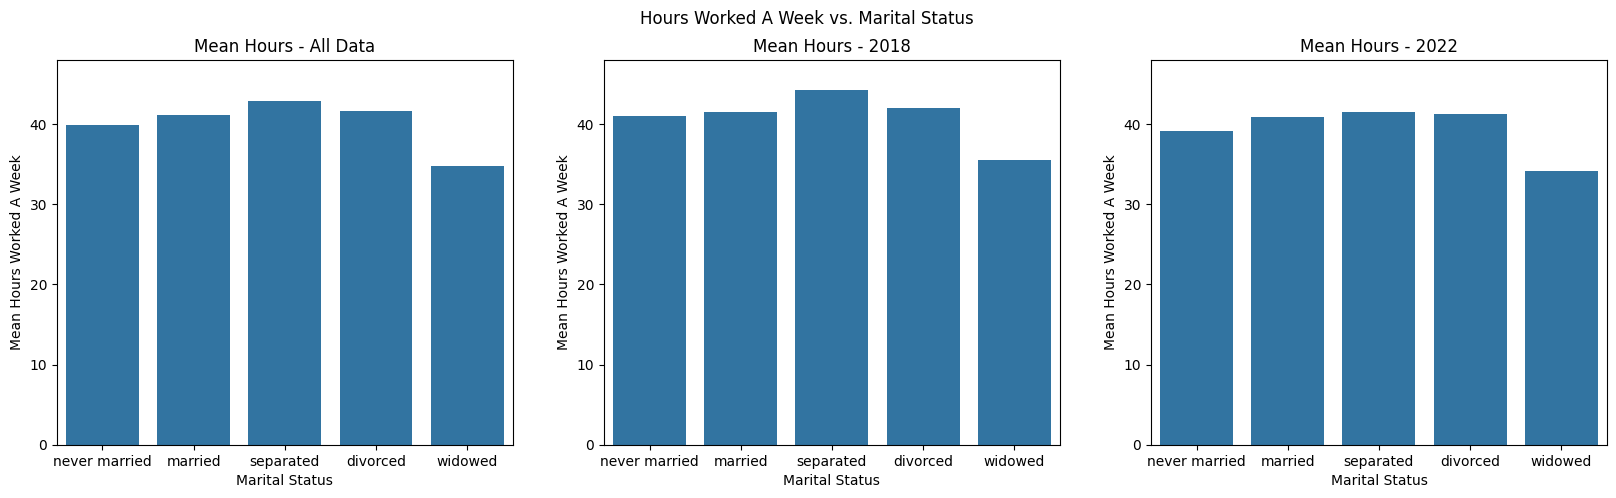

In [ ]:
## barplot: graph marital status by mean hours worked a week
mean_hrs = df.groupby('marital')['hrs1'].mean()
mean_hrs18 = df2018.groupby('marital')['hrs1'].mean()
mean_hrs22 = df2022.groupby('marital')['hrs1'].mean()

print(f'Mean hours 2018 and 2022 {mean_hrs}')
print(f'Mean hours 2018 {mean_hrs18}')
print(f'Mean hours 2022 {mean_hrs22}')

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x=mean_hrs.index, y=mean_hrs.values, ax=axes[0])
axes[0].set_title('Mean Hours - All Data')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Mean Hours Worked A Week')
axes[0].set_ylim([0,48])

sns.barplot(x=mean_hrs18.index, y=mean_hrs18.values, ax=axes[1])
axes[1].set_title('Mean Hours - 2018')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Mean Hours Worked A Week')
axes[1].set_ylim([0,48])

sns.barplot(x=mean_hrs22.index, y=mean_hrs22.values, ax=axes[2])
axes[2].set_title('Mean Hours - 2022')
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Mean Hours Worked A Week')
axes[2].set_ylim([0,48])

plt.suptitle('Hours Worked A Week vs. Marital Status')
plt.show()

We explored work and marriage relationships further using average annual income.
The average income has increased for all relationship types in 2022 when compared to 2018, except for the divorced category. This increase in income is likely due to annual salary increases offered by most employers.

Across both years (2018 and 2022), married individuals tend to have the highest average income, while never married individuals tend to have the lowest average income. It is possible that this difference is due to age. Married individuals are likely older and have more work experience, leading to better paying jobs, while never married individuals are more likely to be at the beginning of their careers. Additionally, theories such as the 'productivity theory' where marriage makes people more productive in the workplace, and  the 'specialization theory' where marriage allows men/women to specialize in the labor market by reducing time spent on housework could factor into these income differences.

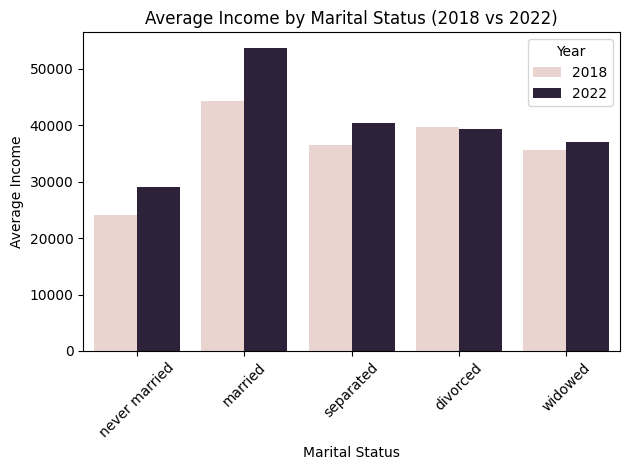

In [ ]:
#Income by marital status in 2018
s_by_mar18 = df2018.groupby('marital')['conrinc'].mean()
s_by_mar18
s_by_mar18_df = pd.DataFrame(s_by_mar18)

#Income by marital status in 2022
s_by_mar22 = df2022.groupby('marital')['conrinc'].mean()
s_by_mar22
#On average - in 2022, salaries by each category of marriage type are higher than their counterparts in 2018 (besides divorced)
s_by_mar22_df = pd.DataFrame(s_by_mar22)

#Combined Plot
s_by_mar18_df['year'] = 2018
s_by_mar22_df['year'] = 2022

comb_data = pd.concat([s_by_mar18_df, s_by_mar22_df])

sns.barplot(x='marital', y='conrinc', hue='year', data=comb_data)
plt.title('Average Income by Marital Status (2018 vs 2022)')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.legend(title='Year')
plt.tight_layout()
plt.show()
#On average, income is higher in 2022 for all categories (except for slightly lower in the divorced section).
#Married people tend to have higher incomes, and never married people tend to have the lowest incomes.

Although separated individuals appear to have the longest working hours, married individuals have the highest salary across marriage statuses. This suggests that investing in personal relationships and maintaining a work-life balance potentially corresponds to a more successful career. Furthermore, a decrease in working hours coincided with an increase in average income for most groups, emphasizing the importance of balance.

**Marital Status and Life**

We explored relationships between marital status and personal life based on opinions on the statement "family life often suffers because men concentrate too much on their work" and number of children. We first focused on opinions on men prioritizing work by marital status.


In 2018, the categories with the highest proportions were "agree" and "disagree". The proportion of marital status type for each opinion on men prioritizing work appears visually similar.
In 2022, there was a decrease in the total proportion of respondents who agree or disagree with the statement that men prioritize work and an increase in the total proportion of respondents who neither agree nor disagree compared to 2018. This could be due to increased uncertainty in all aspects of life after the pandemic. Opinions may have changed after lockdown and remote work due to an increased focus and time spent on family.

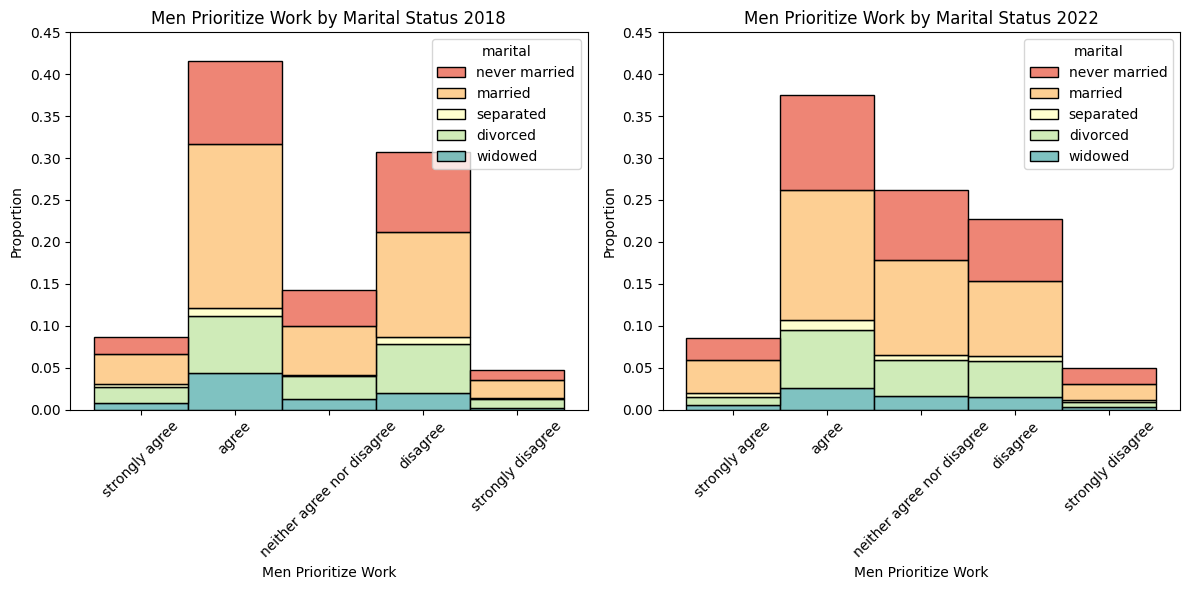

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df2018, x='meovrwrk', hue='marital', stat='proportion', multiple='stack', ax=axes[0], palette = 'Spectral')
axes[0].set_ylim([0, 0.45])
axes[0].tick_params(axis='x', labelrotation=45)
axes[0].set_title("Men Prioritize Work by Marital Status 2018")
axes[0].set_xlabel("Men Prioritize Work")

sns.histplot(data=df2022, x='meovrwrk', hue='marital', stat='proportion', multiple='stack', ax=axes[1], palette = 'Spectral')
axes[1].set_ylim([0, 0.45])
axes[1].tick_params(axis='x', labelrotation=45)
axes[1].set_title("Men Prioritize Work by Marital Status 2022")
axes[1].set_xlabel("Men Prioritize Work")

plt.tight_layout()

plt.show()

In [ ]:
pd.crosstab(df['marital'],df['meovrwrk'],margins=True,normalize='index') # normalize each row

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree
marital,,,,,
never married,0.080895,0.361446,0.226334,0.276248,0.055077
married,0.088646,0.403764,0.216151,0.244687,0.046752
separated,0.173913,0.373913,0.156522,0.226087,0.069565
divorced,0.071533,0.391241,0.208759,0.281752,0.046715
widowed,0.091228,0.452632,0.196491,0.228070,0.031579
All,0.086030,0.391628,0.214689,0.258860,0.048793


The crosstab shows the numeric values in the histplot.
Below shows the proportion of values in each group, normalized by the total amount in each category for "men prioritize work".

Among people who are separated, 17% of respondents strongly agree that men prioritize work, causing family life to suffer. This is the largest proportion of respondents who strongly agree out of all marital status categories. This may be due to separated couples dealing with very significant and potentially recent marriage tensions, causing them to be separated but not yet divorced.

In [ ]:
pd.crosstab(df2018['marital'],df2018['meovrwrk'],margins=True,normalize='index')

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree
marital,,,,,
never married,0.074163,0.368421,0.157895,0.354067,0.045455
married,0.081724,0.447251,0.133730,0.288262,0.049034
separated,0.179487,0.384615,0.076923,0.307692,0.051282
divorced,0.099291,0.372340,0.148936,0.322695,0.056738
widowed,0.097744,0.511278,0.142857,0.225564,0.022556
All,0.086731,0.416181,0.142395,0.307443,0.047249


In [ ]:
pd.crosstab(df2022['marital'],df2022['meovrwrk'],margins=True,normalize='index')

meovrwrk,strongly agree,agree,neither agree nor disagree,disagree,strongly disagree
marital,,,,,
never married,0.084677,0.357527,0.264785,0.232527,0.060484
married,0.093429,0.373717,0.273101,0.214579,0.045175
separated,0.171053,0.368421,0.197368,0.184211,0.078947
divorced,0.052109,0.404467,0.250620,0.253102,0.039702
widowed,0.085526,0.401316,0.243421,0.230263,0.039474
All,0.085568,0.375479,0.262239,0.226905,0.049808


In the married marital status category, the proportion of respondents who agreed that men prioritize work decreased after COVID-19 (0.48 in 2018, 0.37 in 2022). This may be due to a majority of individuals working remotely during COVID, causing a shift in perceptions on whether men prioritize work excessively.

We examined relationships between number of children and marital status, another aspect of family life. As the number of children increases, the number of individuals not married decreases. This is likely a reflection of societal norms and various religions outlining family structures where having children outside of wedlock could be considered a "sin". For married, divorced, separated, and widowed respondents, the peak density in the number of kids displays a similar pattern, with the highest density at 2 kids. There is no considerable change in this data from 2018 to 2022, as it can be expected that deeply rooted customs do not quickly change.

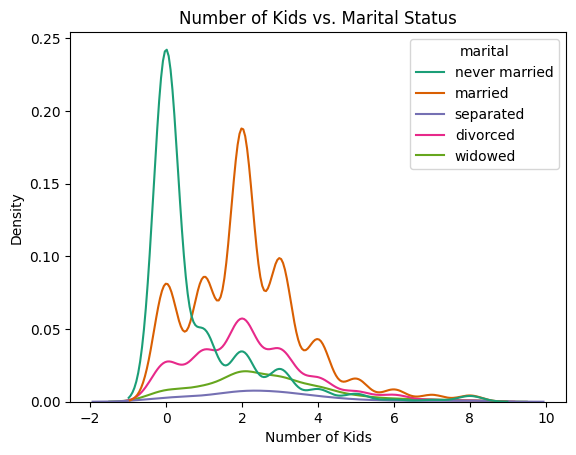

In [ ]:
sns.kdeplot(data=df,x='childs',hue='marital', palette='Dark2')
plt.title('Number of Kids vs. Marital Status')
plt.xlabel('Number of Kids')
plt.show()

In [ ]:
# Cross-tabbing Number of Kids vs. Marital Status 2018
pd.crosstab(df2018['childs'],df2018['marital'],margins=True, normalize=True)

marital,never married,married,separated,divorced,widowed,All
childs,,,,,,
0.0,0.183952,0.061886,0.002988,0.025181,0.008963,0.282971
1.0,0.044814,0.061460,0.002561,0.028596,0.011524,0.148954
2.0,0.027315,0.153649,0.009390,0.054631,0.020913,0.265898
3.0,0.016645,0.080239,0.008536,0.036278,0.021767,0.163466
4.0,0.006402,0.036705,0.003841,0.012377,0.011524,0.070849
5.0,0.003414,0.014511,0.001707,0.007682,0.004268,0.031583
6.0,0.001707,0.008536,0.000854,0.005122,0.003841,0.020060
7.0,0.000854,0.004695,0.000000,0.002134,0.002134,0.009816
8.0,0.000427,0.003414,0.002134,0.000000,0.000427,0.006402


In [ ]:
# Cross-tabbing Number of Kids vs. Marital Status 2022
pd.crosstab(df2022['childs'],df2022['marital'],margins=True, normalize=True)

marital,never married,married,separated,divorced,widowed,All
childs,,,,,,
0.0,0.209375,0.066193,0.003693,0.025852,0.008523,0.313636
1.0,0.035227,0.071023,0.004261,0.034375,0.009091,0.153977
2.0,0.028409,0.146591,0.007955,0.052557,0.023295,0.258807
3.0,0.019318,0.075852,0.006534,0.030966,0.014489,0.147159
4.0,0.007386,0.031818,0.003693,0.016761,0.009659,0.069318
5.0,0.005114,0.011080,0.001136,0.005682,0.003977,0.026989
6.0,0.000852,0.005398,0.000568,0.003977,0.000852,0.011648
7.0,0.001136,0.003125,0.000852,0.000568,0.001136,0.006818
8.0,0.005114,0.003409,0.000284,0.001420,0.001420,0.011648


**Marital Status, Work, and Life**

Finally, we explored features of work, life, and marital status simultaneously. For individuals who never married or are married, beliefs about whether men prioritize work over family do not have a clear relatonship with working hours. Separated individuals who strongly disagreed with the statement that men prioritize work have higher median working hours than those with other beliefs. For divorced individuals, those who strongly disagreed with the statement had a shifted distribution of working hours towards lower values, while those who strongly agreed with the statement had a shift toward higher working values and higher median hours. This trend could represent self-reflection within this group, with individuals who had long working hours recognizing the potential stress their careers placed on their family life. For the widowed category, thsoe who strongly disagreed with the statement generally had lower working hours. This could potentially be due to avoiding assigning blame to their deceased partner, the age of respondents, or flexible schedules.

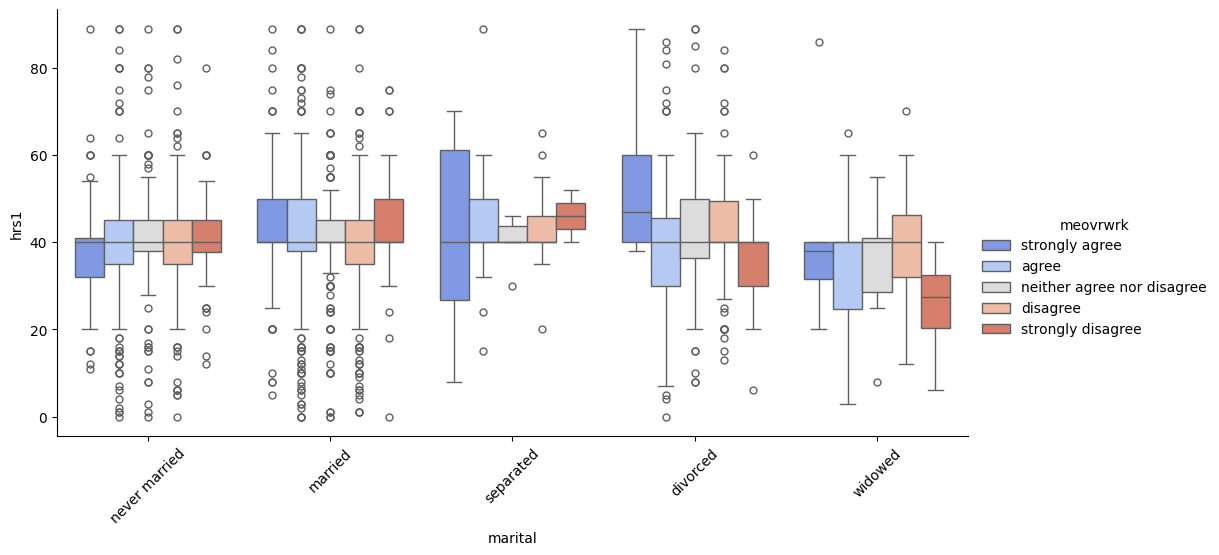

In [ ]:
g=sns.catplot(
    data=df, x="marital", y="hrs1", hue="meovrwrk",
    kind="box", height=5, aspect=2, palette ="coolwarm"
)
g.set_xticklabels(rotation=45)

## **Conclusion**



Our analysis and paper aimed to understand the relationship between marital status and work-life balance before and after the COVID-19 pandemic using data from the General Social Survey (GSS) for the years 2018 and 2022. We analyzed two variables related to work, HRS1  and CONRINC, and three variables related to life: MARITAL, CHILDS, and MEOVRWRK.

Our findings suggested that separated individuals tend to work the most hours per week, while widowed individuals worked the fewest. Married individuals had the highest average income, and the proportion of married respondents who believed men prioritize work decreased after COVID-19. As the number of children increased, the number of individuals not married decreased, likely due to societal and religious pressures.

We also found that individuals with long working hours tended to agree more that their family life suffers because of overwork, indicating a sense of self-reflection regarding work-life balance.

Our findings suggest that work-life balance may be improved through marriage, as married individuals tend to have higher incomes and work less hours. We may also be able to preliminarily state that the COVID-19 pandemic improved work-life balance, as men prioritized work over family and individuals likely prioritized family over work less than before. We would need to do more research and analysis to say any of this for certain.

**Defending the Project**

Our project faced numerous challenges in the beginning, including complications in data cleaning and preparation, subsetting the ideal data, and deciding on appropriate variables for analysis. Despite these challenges, we believe our project provides valuable insights into the relationship between marital status and work-life balance especially in the context of the COVID-19 pandemic.

By focusing on specific variables and years, we were able to conduct a detailed analysis that highlighted how attitudes and behaviors may have changed over time. Additionally, our use of the GSS dataset, which spans over five decades, adds historical context and reliability to our findings, seeing as it has been in use for so long.

One could argue that multiple years of this survey need to be analyzed to show overall trends (not just two years), but we specifically chose the years 2018 and 2022 to show effects of the pandemic. We did not want to add unecessary years that would skew the data.

**Additional Work**

Future work can be done to provide insight into the complexities of work-life balance across different marital states and years. It would be interesting to note if age affects perception of what it means to overwork since studies have been done showing Gen Z individuals feel pressure to complete work outside of office hours and have difficulty setting boundaries due to technological advances. Additionally, understanding the differences in hours worked per week, marital status, and number of kids when comparing genders would be fascinating to demonstrate what perceptions of "work" are. Do men and women agree on what defines these hours even if they are not within traditional in-office spaces? This future work would provide a broader understanding of what balance is and under what contexts it can be found for individuals at different times in their lives.
